# Documentation #005
This week's documentation will be used to facilitate an arranged discussion on Thursday (21st March 2019), which we will focus on discussing about the Bayesian theorem, some definitions may be emphasized. 

## What is Bayesian Theorem?
The Bayesian way of doing statistical analysis aims to retrieve the causes (which are reduced to parameters of a probabilistic generating mechanism) summarized by observations (Robert, 2001).

I've introduced the Bayesian formula in #002 such that for random variables $x$ and $y$, the Bayes' Rule comes in the form of:
$$\Pr\left( y \vert x \right) = \cfrac{p(x,y)}{p(x)}$$
$$p(x,y) = \Pr\left( y \vert x \right) \cdot p(x)$$
Similarly,
$$\Pr\left( x \vert y \right) = \cfrac{p(x,y)}{p(y)}$$
$$p(x,y) = \Pr\left( x \vert y \right) \cdot p(y)$$

Hence,
$$\Pr\left( y \vert x \right) \cdot p(x) = \Pr\left( x \vert y \right) \cdot p(y)$$
$$\Pr\left( y \vert x \right)= \cfrac{\Pr\left( x \vert y \right) \cdot p(y)}{p(x)}$$
$$\Pr\left( y \vert x \right)= \cfrac{\Pr\left( x \vert y \right) \cdot p(y)}{\sum_{y}\Pr\left( x \vert y \right) \cdot p(y)}$$

Now that I think about it, this alone is insufficient to demonstrate what exactly we can do with Bayes' theorem. Continuing from above, $\Pr\left( y \vert x \right)$ can also appear in this form following from the definition of conditional probability and the law of total probability:
$$\Pr\left( y \vert x \right) \equiv \int_{-\infty}^{\infty}P\left(y,\theta \vert x \right)d\theta=\int P(y \vert \theta,x)P(\theta \vert x)d\theta.$$
* The law of total probability states that if $\left\{B_n:n=1,2,3,...\right\}$ is a finite or countably infinite partition of a sample space and each event $B_n$ is measurable, then for any event $A$ of the same probability space: $$\Pr(A)=\sum_{n} \Pr(A \cap B_n)=\sum_{n}\Pr(A\vert B_n)\Pr(B_n)$$ where, for any $n$ for which $\Pr(B_n)=0$ is omitted from the summation since $\Pr(A\vert B_n)$ is finite.

I was already having trouble with this equation since the first time I tried to read Bayesian Data Analysis last year, it was left unsolved until I met it again in VanderPlas' paper. This might come naturally for people working with the theorem, but I wondered how things linked together, so I worked it out. From the Bayes theorem equation:
$$\begin{align*}
P\left( y \vert x \right)
&= \cfrac{P\left( x \vert y \right) \cdot p(y)}{p(x)} \\
&= \cfrac{P(y,x)}{P\left( x \vert y \right) \cdot p(y)+P\left( x \vert y^c \right) \cdot p(y^c)} \\
&= \cfrac{P\left( y \vert x \right) \cdot p(x)}{p(x)}\\
&= \cfrac{\int P(y \vert \theta,x)P(x\vert \theta)P(\theta) d\theta}{\int P(x\vert \theta)P(\theta) d\theta} \\
&= \cfrac{\int P(y\vert \theta,x)P(\theta \vert x)\cdot p(x)d\theta}{p(x)} \\
&= \int P(y \vert \theta,x)P(\theta \vert x)d\theta \\
&= \int P(y \vert \theta,x)\cfrac{P(x\vert \theta)P(\theta)}{p(x)}d\theta \\
&= \int P(y\vert \theta,x)\cdot \cfrac{P(\theta,x)}{p(x)}d\theta\\
&= \int \cfrac{P(y,\theta,x)d\theta }{p(x)} \\ 
&= \int P(y,\theta \vert x)d\theta
\end{align*}$$

* It is very noticeable that a variable $\theta$ is introduced into the equation. 
* The probability distribution function $P(\theta)$ is the prior distribution function, which models the uncertainty on the parameter $\theta$. 
* In VanderPlas' paper, he called $\theta$ the 'nuisance parameter'. 
* The existence of $\theta$ in the equation is a more natural machinery to bring in uncertainties and still be able to quantify $P\left( y \vert x \right)$ by marginalization since we turn the notion of an 'unknown parameter' to a 'random parameter'. 
* Robert (2001) emphasized that the use of a prior distribution is the best way to summarize the available information(or even the lack of information) about this parameter and residual uncertainties, allowing incorporation of this imperfect information in the decision process. 
* The information on $\theta$ is actualized by extracting the information on $\theta$ contained in observation $x$, and thus puts causes (observations) and effects(parameters) (in which both causes and effects have their own distributions) on the same conceptual level (Robert, 2001).
* The Bayes' theorem will be demonstrated by a table and ball example used by VanderPlas(2014) and Eddy(2004), which was adopted from Bayes' paper itself. In this example, the prior is considered a flat prior (an example of improper prior), which means it can't be normalized but can be remedied by setting bounds on it, for the example below, $0\leq p\leq 1$. (Further readings will lead to new terms like proper prior, improper prior (in this case), and conjugate prior. I'll explore these terms when I come to use them.)

The Bayesian and Frequentist are philosophically different in the way they define probability. In classical methods (frequentists), probability means a limiting case of repeated measurements and is related to frequencies of events. In VanderPlas' words, to frequentists, it is meaningless to talk about the TRUE probability of an event. While for Bayesian, probability is a measure of degree of beliefs, a measure of degree of certainty about statements (or in other words measure of uncertainty), and is related to true knowledge of an event. However many seems to intepret frequentist results with Bayesian statements, which can be very misleading. To summarize VanderPlas' paper, what differentiate classical methods and Bayesian methods is the handling of nuisance parameters with prior probability and the handling of uncertainty (confidence interval in classical methods and credibility region in Bayesian methods).



## Table and ball example
Alice, Bob and Carol are in a room playing a game. Alice and Bob will be standing behind a curtain blocking them from seeing Carol and the table. The procedure of the game:
1. Carol will roll the first ball on the table and marks where the ball stops, then take away the ball. How far the ball goes is measured by a scale of 0 to 1. Alice and Bob does not know where is the mark.
2. Carol then roll balls down the table, if the ball lies to the left side of the mark, Alice gets a point, else, Bob gets a point. The first who gets 6 points win.
3. Suppose that 8 balls have been rolled, and Alice now has 5 points and Bob 3, what is the probability that Bob will win the game given the information we have now?

#### Frequentist method
To determine the result, the location of the marker needs to be estimated. The marker placement is quantified by the probability that any roll lands on the left side of the marker (in favor to Alice) by $p$. Because Alice has got 5 points now, the maximum likelihood estimate of $p$ is given by $$\hat p = \cfrac{5}{8}.$$
Since Bob needs another 3 points to win, he will need to win the next three rolls, so $$P(B)=(1-\hat p)^3=0.053$$ or in other words, the odds against Bob winning is 18 to 1.

* Maximum likelihood estimate is the estimator that maximizes the likelihood function $l(\theta \vert x) = p(x\vert \theta)$.

#### Bayesian method
Only because Alice is leading now doesn't mean the mark is favouring her, maybe Bob is just being unlucky? Because $p$ is unknown, so we need to marginalize over the unknown $p$. in other words, we sum up all the probabilities that Bob will still win no matter if $p$ is favoring Alice or not. Let $D$ be the observed data such that $D = (n_A, n_B)=(5,3)$. We want to know $P(B\vert D)$, that is, the probability that Bob will win given the information $D$, with the unknown $p$. Using the property from above, 
$$\begin{align*}
P\left( B \vert D \right)
&= \int P(B \vert p,D)P(p \vert D)dp \\
&= \int P(B \vert p,D)\cfrac{P(D\vert p)P(p)}{P(D)}dp \\
&= \cfrac{\int P(B \vert p,D)P(D\vert p)P(p) dp}{\int P(D\vert p)P(p) dp}. \\
\end{align*}$$

* $P(B \vert p,D)$ is proportional to the frequentist likelihood we used before. In words, it means the probability of Bob winning given that we know what $p$ is (which we don't) and our known information D. Because we don't know what $p$ is, it is in terms of $p$ such that $P(B \vert p,D)=(1-p)^3$.

* $P(D\vert p)$ means, given that we know $p$ (which again we don't), what is the probability of obtaining the $D$ that we know? From the Binomial distribution, we get $P(D\vert p)= (1-p)^3p^5$
* $P(p)$ is the prior on $p$. It is assumed to be uniform across [0,1], meaning each p has equal chances to happen, so it's literally a constant.

With the information above, we can simplify the predictive distribution $P(B\vert D)$ into $$P(B\vert D) = \cfrac{\int_0^1 (1-p)^6p^5dp}{\int_0^1 (1-p)^3p^5dp}.$$
Fortunately, this equation can be solved analytically since we can apply the pdf of the Beta distribution:$$\int_0^1p^{m-1}(1-p)^{n-1}dp = \cfrac{\Gamma(n)\Gamma(m)}{\Gamma(m+n)}.$$
So $$P(B\vert D)=\cfrac{\cfrac{\Gamma(7)\Gamma(6)}{\Gamma(13)}}{\cfrac{\Gamma(4)\Gamma(6)}{\Gamma(10)}}=\cfrac{1}{11}.$$

Now the result is contradicting with the frequentist one, how do we know which is true? If we simulate large number of games, we can see the Bayesian method gave the nearest answer. This is shown by the simulation below, which I adopted from VanderPlas' blog.
* This example shows very clearly that the frequentist's decision lies solely on the frequency of an event happening whereas the Bayesian method takes into account of the uncertainties and aims to model the TRUE value.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# Number of iterations; number of games played.
n_iter = 100000
print("Total number of simulated games: ", n_iter)
#########################################
#     PLAYING ALL THE GAMES AT ONCE     #
#########################################
# Unknown p value for each n_iter of games.
p = np.random.random(n_iter)

# Maximum of 11 rolls for one party to win.
rolls = np.random.random((11,len(p)))

# In each game, if the outcome is less then p of the game, A wins, else B wins
a_count = np.cumsum(rolls < p, 0)
b_count = np.cumsum(rolls >=p, 0)

# Checking
print('Check total outcome is 11:', np.all((a_count+b_count).T == np.arange(1, 12)))

# Collecting the games where after 8 rolls, n_a=5, n_b=3, returns trues and falses
scenario = b_count[7] ==3 
# Scenarios that b wins is true in valid games
bwin_at_ten = b_count[10] ==6

# Switching to dataFrame
games = pd.DataFrame()
games['p'] = p
games['scenario'] = scenario
games['bwin_at_ten'] = bwin_at_ten

## Picking out p-values in games that matches the scenario
games_scenario = games.loc[games['scenario']== True]
games_scenario_bwin = games.loc[(games.scenario==True) & (games.bwin_at_ten==True)]
print("Number of valid games: ", len(games_scenario))
print("Number of valid games that Bob wins: ", len(games_scenario_bwin))

# Probability that b wins
print("Monte Carlo probability that Bob wins: ", len(games_scenario_bwin)/len(games_scenario))
print("MC Odds against Bob winning: {0:.0f} to 1".format((1. - (len(games_scenario_bwin)/len(games_scenario))) \
                                                         / (len(games_scenario_bwin)/len(games_scenario))))

Total number of simulated games:  100000
Check total outcome is 11: True
Number of valid games:  11132
Number of valid games that Bob wins:  1037
Monte Carlo probability that Bob wins:  0.09315486884656846
MC Odds against Bob winning: 10 to 1


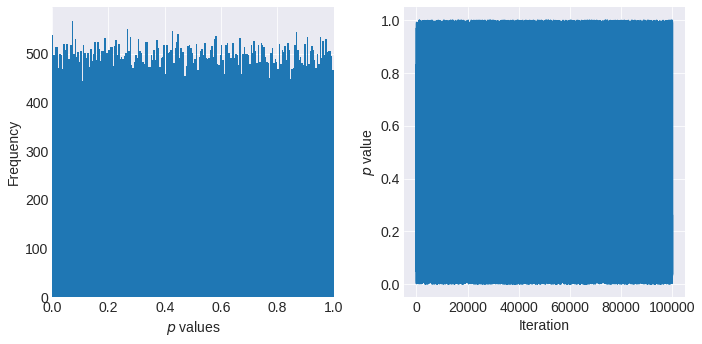

In [12]:
# Graph with p values for all games
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(games['p'], bins=200)
ax1.set_xlabel('$p$ values')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,1)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$p$ value')
ax2.plot(games['p'])
plt.tight_layout()
plt.rcParams.update({'font.size':14})

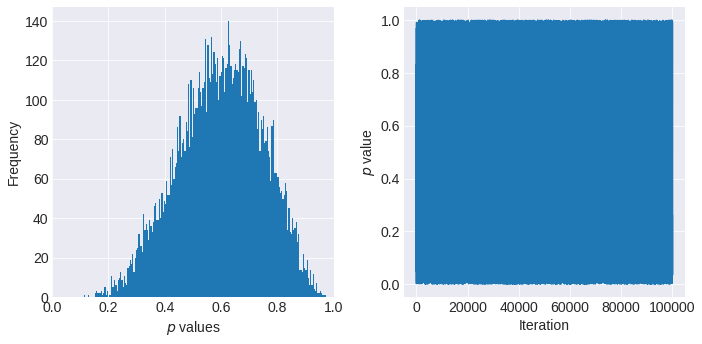

In [13]:
# Graph with p values for games that matches the scenario
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(games_scenario['p'], bins=200)
ax1.set_xlabel('$p$ values')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,1)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$p$ value')
ax2.plot(games['p'])
plt.tight_layout()
plt.rcParams.update({'font.size':14})

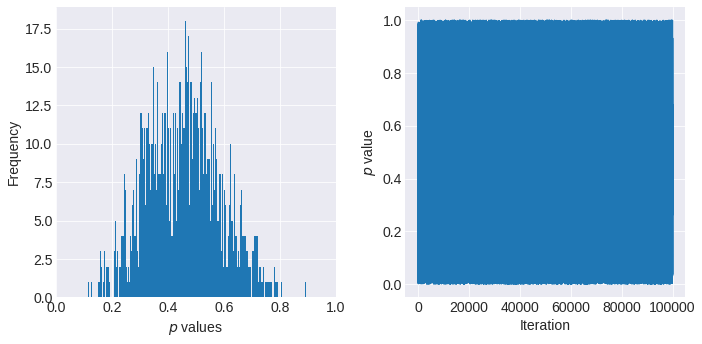

In [14]:
# Graph with p values for games that matches the scenario and b wins
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
ax1.hist(games_scenario_bwin['p'], bins=200)
ax1.set_xlabel('$p$ values')
ax1.set_ylabel('Frequency')
ax1.set_xlim(0,1)
ax2.set_xlabel('Iteration')
ax2.set_ylabel('$p$ value')
ax2.plot(games['p'])
plt.tight_layout()
plt.rcParams.update({'font.size':14})

From the graph above, we can see that even when the marker is not favorable to Bob, there're still chances that he can win the game. The whole process is summarized as:
1. Writing down exactly the probability we want to infer, in terms of only the data we know, then directly solve the equation.
2. We do not attempt to make point estimates of these parameters, but we deal with uncertainty more rigorously by integrating over all possible values that a parameter might assume.
3. The predictive distribution using Bayesian methods is the Bayesian estimation of the true distribution.

## Markov Chain Monte Carlo (MCMC)
* The simulation above is an example of MCMC sampling. We can see how even if the predictive distribution is not solved, MCMC sampling can still  give us the answer.
* This particular problem is fortunate to have an analytical solution but most non-trivial problems can't be solved analytically and may involve plenty of parameters (that on the other can, can be discrete or continuous), so MCMC methods are used to deal with them.
* MCMC are used to compute summaries based on samples drawn from the posterior distribution.
* In PyMC3, MCMC algorithms are assigned automatically to the parameters based on their characteristics. For example, the Metropolis algorithm will be assigned to discrete variables, Binary Metropolis to Binary variables, No-U-Turn-Sampling (NUTS) to continuous variables.
* In most cases, if not specified and parameters are continuous, PyMC3 would automatically assign NUTS as the default gradient-based sampling methods as explained by the PYMC3 documentation:
    1. NUTS is the most capable step method.
    2. NUTS is useful on models that have many continuous parameters (a situation where other MCMC methods would work very slowly.
    3. NUTS takes advantage of information about where regions of higher probability are, based on the gradient of the log posterior density to achieve faster convergence.
    4. Though can't be used on undifferentiable random variables, NUTS may still be used on the differentiable variables in a model that contains undifferentiable variables.

## Next up
* Having the need to accelerate my progress, I've gone back to reading the Bayesian Data Analysis book by Gelman et al (2014) from the previous Doing Bayesian Data Analysis book by Kruschke (2015) that I was reading, since I think I've gained enough confidence to move on. Bayesian Data Analysis is, in my opinion, a rather practical book, and knowing Dr Lee might challenge me rigorously on the math behind the Bayesian methods, I've found a companion book just to do so - The Bayesian Choice by Christian Robert (2001). I've had several complications while reading Vanderplas' paper and this book cleared up some of the confusions, and maybe raised a few more...orz
* My knowledge on MCMC algorithms, though sufficient to operate PyMC3, but in order to know exactly what's going on, much further reading is required. I'm still keeping one of the paper Dr Lee sent me last year as well as the PyMC paper, should start working on them (though should've been started much earlier).
* Today's documentation was uploaded late mainly because I was trying to simulate the table and ball example in PyMC3 but still couldn't get it working until this morning (I guess it was an overkill afterall), hence I ended up adopting the code from VanderPlas' blog. In the coming week(s) I'll be trying to apply PyMC3 into the nonlinear mixed effect framework of the actuarial problem.

### References

S. R. Eddy. What is Bayesian statistics?. Nature Biotechnology 22:1177-1178, 2004.
Accessible at [https://www.nature.com/articles/nbt0904-1177].

C. P. Robert. The Bayesian Choice: From Decision-Theoretic Foundations to Computational Implementation. Springer Science & Business Media, New York, 2001.

J. VanderPlas. Frequentism and Bayesianism: A Python-driven Primer. Accessible at [https://arxiv.org/abs/1411.5018].

http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/

https://docs.pymc.io/notebooks/getting_started.html